<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(2_8)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.8_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,26.676458,20.137417,85.063092,-70.190902,71.686066,112.882006,-41.195940
1,0.0,1.0,68.557615,73.345181,37.909268,33.229305,223.041369,26.265960,196.775409
2,0.0,2.0,74.849614,76.130482,52.715544,408.016376,621.712016,-37.870549,659.582566
3,0.0,3.0,27.157307,97.588727,82.828396,-1911.322652,-1693.748223,-277.286651,-1416.461572
4,0.0,4.0,50.344053,84.376157,78.431236,-355.662911,-132.511465,-183.046183,50.534718
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,49.458661,58.888732,22.922752,-676.722269,-535.452124,-165.662092,-369.790032
29996,999.0,26.0,66.857273,88.314641,55.994911,-183.736066,37.430760,126.473498,-89.042739
29997,999.0,27.0,98.850813,77.493794,78.415525,284.223067,548.983199,284.910714,264.072484
29998,999.0,28.0,91.183790,24.032265,66.630093,-62.437240,129.408908,124.407047,5.001862


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    26.676458  20.137417  85.063092   -70.190902    71.686066   
      1.0    68.557615  73.345181  37.909268    33.229305   223.041369   
      2.0    74.849614  76.130482  52.715544   408.016376   621.712016   
      3.0    27.157307  97.588727  82.828396 -1911.322652 -1693.748223   
      4.0    50.344053  84.376157  78.431236  -355.662911  -132.511465   
...                ...        ...        ...          ...          ...   
999.0 25.0   49.458661  58.888732  22.922752  -676.722269  -535.452124   
      26.0   66.857273  88.314641  55.994911  -183.736066    37.430760   
      27.0   98.850813  77.493794  78.415525   284.223067   548.983199   
      28.0   91.183790  24.032265  66.630093   -62.437240   129.408908   
      29.0   72.376674  97.198664  90.607799   569.880306   840.063443   

                  y_hat        e_hat  
rep   index                           
0.0   0.0    112.882006   -41.195940  
      1.0     26.265960   196.775409  
      2.0    -37.870549   659.582566  
      3.0   -277.286651 -1416.461572  
      4.0   -183.046183    50.534718  
...                 ...          ...  
999.0 25.0  -165.662092  -369.790032  
      26.0   126.473498   -89.042739  
      27.0   284.910714   264.072484  
      28.0   124.407047     5.001862  
      29.0   403.028026   437.035417  

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    26.676458  20.137417  85.063092   -70.190902    71.686066   
      1.0    68.557615  73.345181  37.909268    33.229305   223.041369   
      2.0    74.849614  76.130482  52.715544   408.016376   621.712016   
      3.0    27.157307  97.588727  82.828396 -1911.322652 -1693.748223   
      4.0    50.344053  84.376157  78.431236  -355.662911  -132.511465   
...                ...        ...        ...          ...          ...   
999.0 25.0   49.458661  58.888732  22.922752  -676.722269  -535.452124   
      26.0   66.857273  88.314641  55.994911  -183.736066    37.430760   
      27.0   98.850813  77.493794  78.415525   284.223067   548.983199   
      28.0   91.183790  24.032265  66.630093   -62.437240   129.408908   
      29.0   72.376674  97.198664  90.607799   569.880306   840.063443   

                  y_hat        e_hat  
rep   index                           
0.0   0.0    112.882006   -41.195940  
      1.0     26.265960   196.775409  
      2.0    -37.870549   659.582566  
      3.0   -277.286651 -1416.461572  
      4.0   -183.046183    50.534718  
...                 ...          ...  
999.0 25.0  -165.662092  -369.790032  
      26.0   126.473498   -89.042739  
      27.0   284.910714   264.072484  
      28.0   124.407047     5.001862  
      29.0   403.028026   437.035417  

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,26.676458,20.137417,85.063092,-70.190902,71.686066,112.882006,-41.195940
1,0.0,1.0,68.557615,73.345181,37.909268,33.229305,223.041369,26.265960,196.775409
2,0.0,2.0,74.849614,76.130482,52.715544,408.016376,621.712016,-37.870549,659.582566
3,0.0,3.0,27.157307,97.588727,82.828396,-1911.322652,-1693.748223,-277.286651,-1416.461572
4,0.0,4.0,50.344053,84.376157,78.431236,-355.662911,-132.511465,-183.046183,50.534718
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,49.458661,58.888732,22.922752,-676.722269,-535.452124,-165.662092,-369.790032
29996,999.0,26.0,66.857273,88.314641,55.994911,-183.736066,37.430760,126.473498,-89.042739
29997,999.0,27.0,98.850813,77.493794,78.415525,284.223067,548.983199,284.910714,264.072484
29998,999.0,28.0,91.183790,24.032265,66.630093,-62.437240,129.408908,124.407047,5.001862


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    26.676458  20.137417  85.063092   -70.190902    71.686066   
      1.0    68.557615  73.345181  37.909268    33.229305   223.041369   
      2.0    74.849614  76.130482  52.715544   408.016376   621.712016   
      3.0    27.157307  97.588727  82.828396 -1911.322652 -1693.748223   
      4.0    50.344053  84.376157  78.431236  -355.662911  -132.511465   
...                ...        ...        ...          ...          ...   
999.0 25.0   49.458661  58.888732  22.922752  -676.722269  -535.452124   
      26.0   66.857273  88.314641  55.994911  -183.736066    37.430760   
      27.0   98.850813  77.493794  78.415525   284.223067   548.983199   
      28.0   91.183790  24.032265  66.630093   -62.437240   129.408908   
      29.0   72.376674  97.198664  90.607799   569.880306   840.063443   

                  y_hat        e_hat  
rep   index                           
0.0   0.0    112.882006   -41.195940  
      1.0     26.265960   196.775409  
      2.0    -37.870549   659.582566  
      3.0   -277.286651 -1416.461572  
      4.0   -183.046183    50.534718  
...                 ...          ...  
999.0 25.0  -165.662092  -369.790032  
      26.0   126.473498   -89.042739  
      27.0   284.910714   264.072484  
      28.0   124.407047     5.001862  
      29.0   403.028026   437.035417  

[30000 rows x 7 columns]

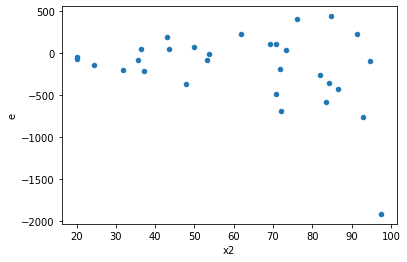

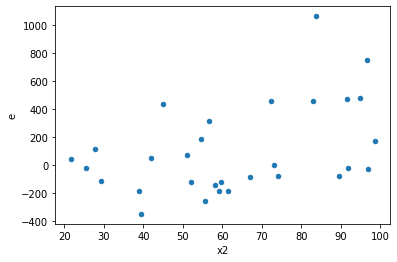

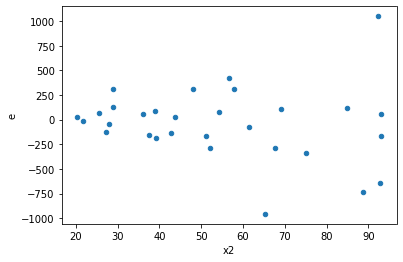

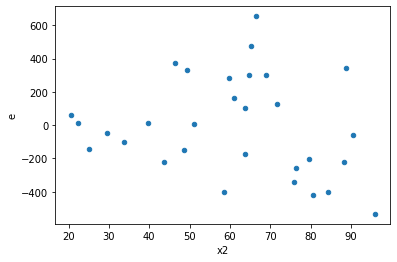

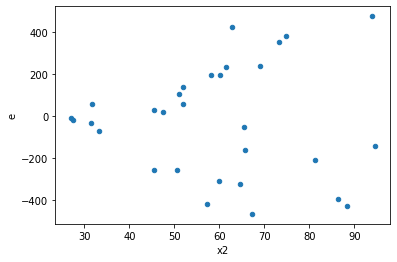

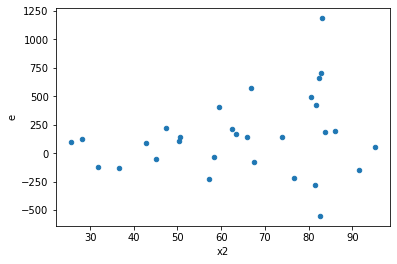

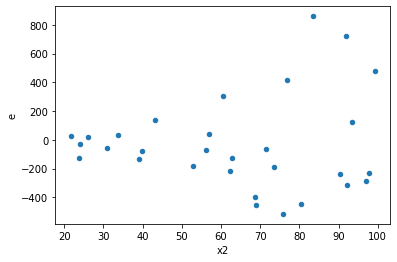

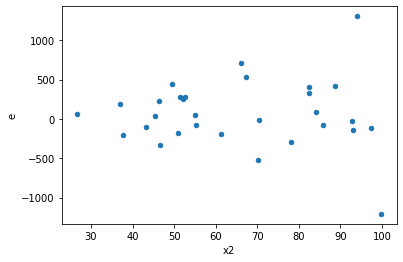

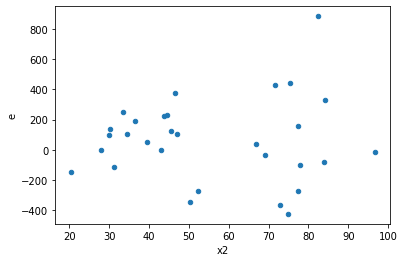

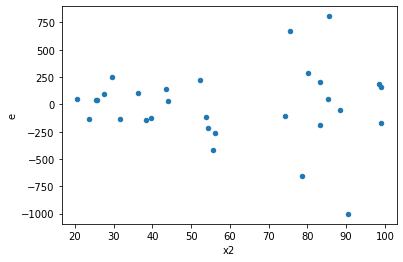

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,15.0,9.0,768860.858417074,2398877.9441901464,51257.390561138265,266541.99379890517,5.200069509605291,0.01698678640351492,0.9915066067982425,0.00849339320175746,Reject001=1 : Homoscedasticity
2.0,14.0,10.0,506159.0351630328,2407167.1205006833,36154.216797359484,240716.71205006834,6.65805356534923,0.004776452700956169,0.9976117736495219,0.0023882263504780843,Reject001=0 : Heteroscedasticity
3.0,13.0,11.0,865337.2700579285,1073030.2881368487,66564.40538907143,97548.2080124408,1.4654710342902921,0.5322895448075529,0.7338552275962236,0.26614477240377643,Reject001=1 : Homoscedasticity
6.0,14.0,10.0,658844.5022597953,1890868.2574985805,47060.32158998538,189086.82574985805,4.017967140073613,0.03261363833281061,0.9836931808335947,0.016306819166405306,Reject001=1 : Homoscedasticity
7.0,9.0,15.0,1268530.2428686293,2446638.7718586754,140947.80476318102,163109.25145724503,1.157231584637302,0.7707957805763574,0.6146021097118213,0.3853978902881787,Reject001=1 : Homoscedasticity
9.0,16.0,8.0,1268984.7092599717,1623721.527261165,79311.54432874823,202965.19090764562,2.5590876161274845,0.18032680404393808,0.909836597978031,0.09016340202196904,Reject001=1 : Homoscedasticity
13.0,15.0,9.0,296408.86976289947,326458.54810941103,19760.591317526632,36273.17201215678,1.8356319114795079,0.35957218169323646,0.8202139091533818,0.17978609084661823,Reject001=1 : Homoscedasticity
15.0,11.0,13.0,486849.8648572867,3101331.2501928927,44259.0786233897,238563.9423225302,5.39016964976889,0.005480244379994836,0.9972598778100026,0.002740122189997418,Reject001=0 : Heteroscedasticity
19.0,13.0,11.0,1010055.1533495286,901177.0825110285,77696.55025765604,81925.18931918441,1.0544250555205532,0.9416162045195327,0.5291918977402337,0.4708081022597663,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,15.0,9.0,768860.858417074,2398877.9441901464,51257.390561138265,266541.99379890517,5.200069509605291,0.01698678640351492,Reject001=1 : Homoscedasticity
1.0,10.0,14.0,1398766.654461455,597613.0905359132,139876.66544614552,42686.649323993806,0.30517348399636224,0.0652642269868222,Reject001=1 : Homoscedasticity
2.0,14.0,10.0,506159.0351630328,2407167.1205006833,36154.216797359484,240716.71205006834,6.65805356534923,0.004776452700956169,Reject001=0 : Heteroscedasticity
3.0,13.0,11.0,865337.2700579285,1073030.2881368487,66564.40538907143,97548.2080124408,1.4654710342902921,0.5322895448075529,Reject001=1 : Homoscedasticity
4.0,8.0,16.0,653105.8144604531,901624.0384957759,81638.22680755664,56351.50240598599,0.6902587747137344,0.6099094305088575,Reject001=1 : Homoscedasticity
5.0,8.0,16.0,1054768.3083825242,784217.6039810531,131846.03854781552,49013.60024881582,0.37174875171574046,0.1589047625472659,Reject001=1 : Homoscedasticity
6.0,14.0,10.0,658844.5022597953,1890868.2574985805,47060.32158998538,189086.82574985805,4.017967140073613,0.03261363833281061,Reject001=1 : Homoscedasticity
7.0,9.0,15.0,1268530.2428686293,2446638.7718586754,140947.80476318102,163109.25145724503,1.157231584637302,0.7707957805763574,Reject001=1 : Homoscedasticity
8.0,13.0,11.0,1475126.4251677268,252782.6556345496,113471.26347444052,22980.24142132269,0.2025203625806018,0.008197507087643838,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      761
Reject001=0 : Heteroscedasticity    239
Name: Result_test, dtype: int64